In [1]:
import single_beam_analysis as sa
import pandas as pd
import numpy as np
import root_pandas as rp
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.patches import Patch
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

rc('text', usetex=True)
import ROOT
import array

Welcome to JupyROOT 6.18/04


In [2]:
tpcs = ["kohola", "nene", "iiwi", "honu", "humu", "tako", "elepaio", "palila"]
phis = ["BWD 18", "BWD 90", "BWD 198", "BWD 270", "FWD 22", "FWD 90", "FWD 202", "FWD 270"]
hist, params_HER = sa.create_histograms(11, "HER")
hist, params_LER = sa.create_histograms(12, "LER")
rates_LER = pd.DataFrame.from_dict(params_LER, orient = 'index').T
rates_HER = pd.DataFrame.from_dict(params_HER, orient = 'index').T
rates_LER = rates_LER[['data_rates_BG', 'data_rates_T', 'sim_rates_BG', 'sim_rates_T']]
rates_HER = rates_HER[['data_rates_BG', 'data_rates_T', 'sim_rates_BG', 'sim_rates_T']]
rates_LER.columns = ['LER_BG', 'LER_T', 'LER_MC_BG', 'LER_MC_T']
rates_HER.columns = ['HER_BG', 'HER_T', 'HER_MC_BG', 'HER_MC_T']
rates_LER[['HER_BG', 'HER_T', 'HER_MC_BG', 'HER_MC_T']] = rates_HER[['HER_BG', 'HER_T', 'HER_MC_BG', 'HER_MC_T']]
rates = rates_LER
rates = rates.reindex(tpcs)
#rates = rates[['LER_MC_BG', 'LER_MC_T', 'HER_MC_BG', 'HER_MC_T', 'LER_BG', 'LER_T', 'HER_BG', 'HER_T']]
rates.index = phis
rates = rates[['LER_BG', 'LER_MC_BG', 'LER_T', 'LER_MC_T', 'HER_BG', 'HER_MC_BG', 'HER_T', 'HER_MC_T']]
rates_total = pd.DataFrame()
rates_total['LER total'] = rates[['LER_BG', 'LER_T']].T.sum()
rates_total['MC LER total'] = rates[['LER_MC_BG', 'LER_MC_T']].T.sum()
rates_total['HER total'] = rates[['HER_BG', 'HER_T']].T.sum()
rates_total['MC HER total'] = rates[['HER_MC_BG', 'HER_MC_T']].T.sum()
rates_all = rates
rates_all['LER_total'] = rates_total['LER total']
rates_all['LER_total_MC'] = rates_total['MC LER total']
rates_all['HER_total'] = rates_total['HER total']
rates_all['HER_total_MC'] = rates_total['MC HER total']
rates_all = rates_all[['LER_total', 'LER_total_MC', 'LER_BG', 'LER_MC_BG', 'LER_T', 'LER_MC_T', 'HER_total', 'HER_total_MC', 'HER_BG', 'HER_MC_BG', 'HER_T', 'HER_MC_T']]

#patterns =('','/', '','/','','\\','','\\')
patterns = ('/','/','\\','\\','','','','')
patterns_total = ('', '/', '', '\\')

#colors = ['cyan', matplotlib.colors.colorConverter.to_rgba('#00FFFF', alpha=0.5), 'magenta', matplotlib.colors.colorConverter.to_rgba('#FF00FF', alpha=0.5), 'yellow', matplotlib.colors.colorConverter.to_rgba('#FFFF00', alpha = 0.5), 'indigo', matplotlib.colors.colorConverter.to_rgba('#4b0082', alpha = 0.5)]

colors = [matplotlib.colors.colorConverter.to_rgba('#00FFFF', alpha=0.5), matplotlib.colors.colorConverter.to_rgba('#FF00FF', alpha=0.5), matplotlib.colors.colorConverter.to_rgba('#FFFF00', alpha = 0.5), matplotlib.colors.colorConverter.to_rgba('#4b0082', alpha = 0.5), 'cyan', 'magenta', 'yellow', 'indigo']
colors_total = ['red', matplotlib.colors.colorConverter.to_rgba('#FF0000', alpha=0.5), 'blue', matplotlib.colors.colorConverter.to_rgba('#0000FF', alpha = 0.5)]

#legend_elements = [Patch(facecolor=colors[0], edgecolor='black',label = 'LER BeamGas'), Patch(facecolor=colors[2], edgecolor='black',label = 'LER Touschek'), Patch(facecolor=colors[4], edgecolor='black',label = 'HER BeamGas'), Patch(facecolor=colors[6], edgecolor='black',label = 'HER Touschek'), Patch(facecolor=colors[1], edgecolor='black',label = 'LER BeamGas', hatch = '//'), Patch(facecolor=colors[3], edgecolor='black',label = 'LER Touschek', hatch = '\\\\'), Patch(facecolor=colors[5], edgecolor='black',label = 'HER BeamGas', hatch = '//'), Patch(facecolor=colors[7], edgecolor='black',label = 'HER Touschek', hatch = '\\\\')]

legend_elements = [Patch(facecolor=colors[4], edgecolor='black',label = 'LER BeamGas'), Patch(facecolor=colors[5], edgecolor='black',label = 'LER Touschek'), Patch(facecolor=colors[6], edgecolor='black',label = 'HER BeamGas'), Patch(facecolor=colors[7], edgecolor='black',label = 'HER Touschek'), Patch(facecolor=colors[0], edgecolor='black',label = 'LER BeamGas', hatch = '//'), Patch(facecolor=colors[1], edgecolor='black',label = 'LER Touschek', hatch = '\\\\'), Patch(facecolor=colors[2], edgecolor='black',label = 'HER BeamGas', hatch = '//'), Patch(facecolor=colors[3], edgecolor='black',label = 'HER Touschek', hatch = '\\\\')]  

legend_elements_total = [Patch(facecolor=colors_total[0], edgecolor='black',label = 'LER Total'), Patch(facecolor=colors_total[1], edgecolor='black',label = 'MC LER Total', hatch = '//'), Patch(facecolor=colors_total[2], edgecolor='black',label = 'HER Total'), Patch(facecolor=colors_total[3], edgecolor='black',label = 'MC HER Total', hatch = '\\\\')]

~/workspace/jeff_workspace/analysis/phase2/analysis_module.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heuristic_df[module+'_heuristic_err'][i] = 0
~/workspace/jeff_workspace/analysis/phase2/analysis_module.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heuristic_df[module+'_heuristic_err'][i] = heuristic_df[module+'_heuristic'][i]*math.sqrt((heuristic_df[module+'_err'][i]/heuristic_df[module+'_mean'][i])**2 + (heuristic_df['dI'][i]/heuristic_df['I'][i])**2+(heuristic_df['dP'][i]/heuristic_df['P'][i])**2)
~/workspace/jeff_workspace/analysis/phase2/analysis_module.py:274: SettingWithCopyWarning: 
A valu

 FCN=634.275 FROM MIGRAD    STATUS=CONVERGED     103 CALLS         104 TOTAL
                     EDM=9.38372e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.57895e+04   7.00842e+02   7.98959e-05  -2.14885e-02
   2  p1           3.72368e-02   1.11143e-02   2.44258e-04   3.63949e-04
 FCN=748.385 FROM MIGRAD    STATUS=CONVERGED      83 CALLS          84 TOTAL
                     EDM=2.84339e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.34780e+03   5.39885e+02   8.94152e-05   1.07779e-01
   2  p1           4.17346e-02   8.81923e-03   1.91029e-04   5.28195e-02
 FCN=657.783 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=1.79

In [3]:
def plot(df = rates, patterns = patterns, colors = colors, legend_elements = legend_elements, stacked = False, logy = True):
    ax = plt.figure(figsize=(10, 6)).add_subplot(111)
    if (stacked == True) & (len(df.columns) > 7):
        df = df[['LER_MC_BG', 'LER_MC_T', 'HER_MC_BG', 'HER_MC_T', 'LER_BG', 'LER_T', 'HER_BG', 'HER_T']]
        if logy == True:
            plt.ylim(4e-1,4e1)
        #df['sum'] = df.sum(axis = 1)
        #for col in df.columns:
        #    df[col] = df[col]/df['sum']
        #df = df[['LER_MC_BG', 'LER_MC_T', 'HER_MC_BG', 'HER_MC_T', 'LER_BG', 'LER_T', 'HER_BG', 'HER_T']]
    df.plot(kind = 'bar', stacked = stacked, color = colors, linewidth = 1, logy = logy, ax = ax, legend = False, width = 0.75)
    bars = ax.patches
    hatches = [p for p in patterns for i in range(len(df))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)
    ax.legend(handles = legend_elements, title = r'Data $\qquad \qquad \qquad \qquad \qquad \quad$MC', ncol = 2)
    plt.tight_layout()
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=18)
    plt.ylabel("Rate [Hz]")
    plt.axes().yaxis.set_minor_locator(AutoMinorLocator())
    matplotlib.rc('xtick', labelsize=20)
    matplotlib.rc('ytick', labelsize=20)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: AutoMinorLocator does not work with logarithmic scale
  func(*args, **kwargs)
/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


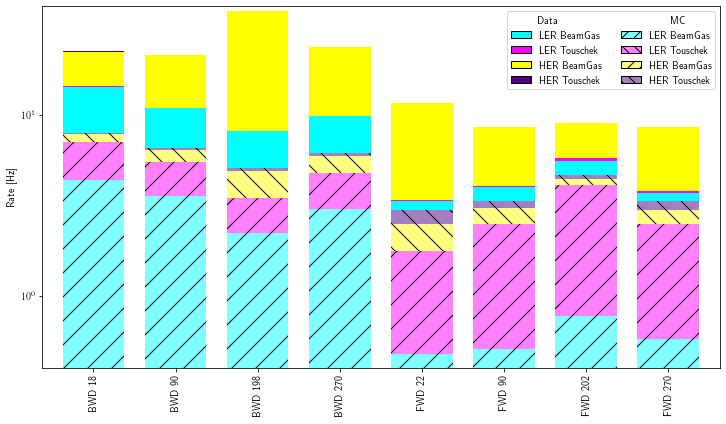

In [4]:
plot(stacked = True)

In [34]:
c = ROOT.TCanvas('c', 'c', 800, 600)
c.Divide(1,2,0)
c.cd(1)
stack_LER = ROOT.THStack('', 'LER')
data_LER = {}
keys_LER = ['LER_total', 'LER_total_MC', 'LER_BG', 'LER_BG_MC', 'LER_T', 'LER_T_MC']
i = 0
for key in keys_LER:
    data_LER[key] = array.array('d', rates_all.T.iloc[i])
    i += 1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [35]:
hists_LER = {}
xs = [i for i in range(1,9)]
i = 0
linestyles_LER = [1, 10, 1, 10, 1, 10]
linecolors_LER = [1,1,67,67,6,6]
for key in keys_LER:
    hists_LER[key] = ROOT.TH1F('h%s'%(key), 'h%s'%(key), 8, -0.5, 7.5)
    for j in range(0,len(data_LER[key])):
        hists_LER[key].SetBinContent(xs[j], data_LER[key][j])
        hists_LER[key].GetXaxis().SetBinLabel(j+1, rates.T.columns[j])
    hists_LER[key].SetLineStyle(linestyles_LER[i])
    hists_LER[key].SetLineColor(linecolors_LER[i])
    if linecolors_LER[i] == 1:
        hists_LER[key].SetLineWidth(12)
        hists_LER[key].SetLineColorAlpha(1, 0.7)
    else:
        hists_LER[key].SetLineWidth(6)
    hists_LER[key].Draw()
    stack_LER.Add(hists_LER[key])
    i += 1
ROOT.gPad.SetLogy()
stack_LER.SetMinimum(5e-2)
stack_LER.SetMaximum(2e1)
stack_LER.Draw('nostack')
stack_LER.GetYaxis().SetTitleSize(0.1)
stack_LER.GetYaxis().SetTitleOffset(0.5)
stack_LER.GetYaxis().SetTitle("Rate [Hz]")
stack_LER.GetYaxis().SetLabelSize(0.1)
l1 = ROOT.TLegend(1,0.79,0.88,1)
l1.AddEntry(hists_LER['LER_total'], "Total", "l")
l1.AddEntry(hists_LER['LER_BG'], "Beam gas", "l")
l1.AddEntry(hists_LER['LER_T'], "Touschek", "l")
l1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hLER_total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hLER_total_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hLER_BG (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hLER_BG_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hLER_T (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hLER_T_MC (Potential memory leak).


In [36]:
c.cd(2)
stack_HER = ROOT.THStack('', 'HER')
data_HER = {}
keys_HER = ['HER_total', 'HER_total_MC', 'HER_BG', 'HER_BG_MC', 'HER_T', 'HER_T_MC']
i = 6
for key in keys_HER:
    data_HER[key] = array.array('d', rates_all.T.iloc[i])
    i += 1

In [37]:
hists_HER = {}
xs = [i for i in range(1,9)]
i = 0
linestyles_HER = [1, 10, 1, 10,1,10]
linecolors_HER = [1,1,90,90,9,9]
for key in keys_HER:
    hists_HER[key] = ROOT.TH1F('h%s'%(key), 'h%s'%(key), 8, -0.5, 7.5)
    for j in range(0,len(data_HER[key])):
        hists_HER[key].SetBinContent(xs[j], data_HER[key][j])
        hists_HER[key].GetXaxis().SetBinLabel(j+1, rates.T.columns[j])
    hists_HER[key].SetLineStyle(linestyles_HER[i])
    hists_HER[key].SetLineColor(linecolors_HER[i])
    if linecolors_HER[i] == 1:
        hists_HER[key].SetLineWidth(12)
        hists_HER[key].SetLineColorAlpha(1, 0.7)
    else:
        hists_HER[key].SetLineWidth(6)
    hists_HER[key].Draw()
    stack_HER.Add(hists_HER[key])
    i += 1

Warning in <TROOT::Append>: Replacing existing TH1: hHER_total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hHER_total_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hHER_BG (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hHER_BG_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hHER_T (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hHER_T_MC (Potential memory leak).


Info in <TCanvas::Print>: png file tpc_phi_new.png has been created


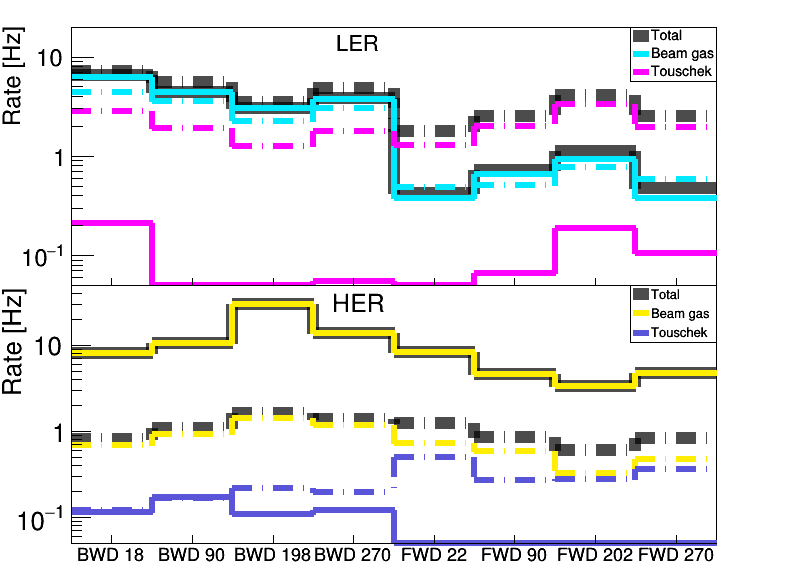

In [38]:
ROOT.gPad.SetLogy()
ROOT.gStyle.SetLabelSize(0.1)
stack_HER.SetMinimum(5e-2)
stack_HER.SetMaximum(5e1)
stack_HER.Draw('nostack')
stack_HER.GetYaxis().SetLabelSize(0.1)
stack_HER.GetYaxis().SetTitle("Rate [Hz]")
stack_HER.GetYaxis().SetTitleSize(0.1)
stack_HER.GetYaxis().SetTitleOffset(0.5)
l2 = ROOT.TLegend(1,0.8,0.88,1)
l2.AddEntry(hists_HER['HER_total'], "Total", "l")
l2.AddEntry(hists_HER['HER_BG'], "Beam gas", "l")
l2.AddEntry(hists_HER['HER_T'], "Touschek", "l")
l2.Draw()
c.SaveAs('tpc_phi_new.png')
c.Draw()